## Task 1: Data Overview

- Display first 5 rows
- Check for missing values
- Unique values in categorical columns


In [2]:
import pandas as pd

# Load dataset
df = pd.read_csv("netflix_customer_churn.csv")

# Display first 5 rows
df.head()


,customer_id,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre
0,a9b75100-82a8-427a-a208-72f24052884a,51,Other,Basic,14.73,29,Africa,TV,8.99,1,Gift Card,1,0.49,Action
1,49a5dfd9-7e69-4022-a6ad-0a1b9767fb5b,47,Other,Standard,0.70,19,Europe,Mobile,13.99,1,Gift Card,5,0.03,Sci-Fi
2,4d71f6ce-fca9-4ff7-8afa-197ac24de14b,27,Female,Standard,16.32,10,Asia,TV,13.99,0,Crypto,2,1.48,Drama
3,d3c72c38-631b-4f9e-8a0e-de103cad1a7d,53,Other,Premium,4.51,12,Oceania,TV,17.99,1,Crypto,2,0.35,Horror
4,4e265c34-103a-4dbb-9553-76c9aa47e946,56,Other,Standard,1.89,13,Africa,Mobile,13.99,1,Crypto,2,0.13,Action


In [3]:
# Check for missing/null values
df.isnull().sum()


customer_id               0
age                       0
gender                    0
subscription_type         0
watch_hours               0
last_login_days           0
region                    0
device                    0
monthly_fee               0
churned                   0
payment_method            0
number_of_profiles        0
avg_watch_time_per_day    0
favorite_genre            0
dtype: int64

In [4]:
# Unique values in categorical columns
categorical_cols = ['gender', 'subscription_type', 'region', 'device', 'payment_method', 'favorite_genre']
for col in categorical_cols:
    print(f"{col}: {df[col].unique()}")


gender: ['Other' 'Female' 'Male']
subscription_type: ['Basic' 'Standard' 'Premium']
region: ['Africa' 'Europe' 'Asia' 'Oceania' 'South America' 'North America']
device: ['TV' 'Mobile' 'Laptop' 'Desktop' 'Tablet']
payment_method: ['Gift Card' 'Crypto' 'Debit Card' 'PayPal' 'Credit Card']
favorite_genre: ['Action' 'Sci-Fi' 'Drama' 'Horror' 'Romance' 'Comedy' 'Documentary']


# Task 2: Univariate Analysis

- Plot distributions of numerical features
- Count plots for categorical features


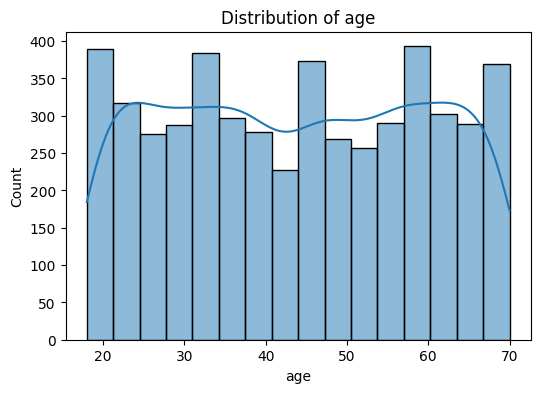

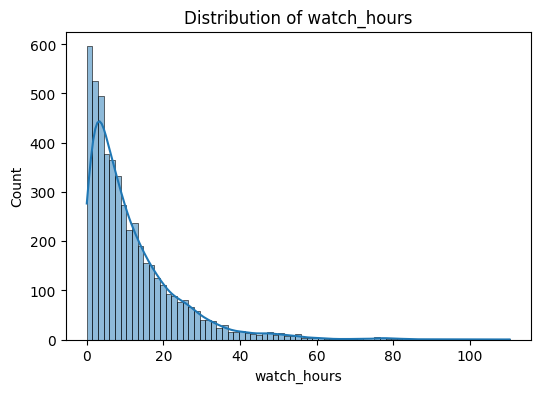

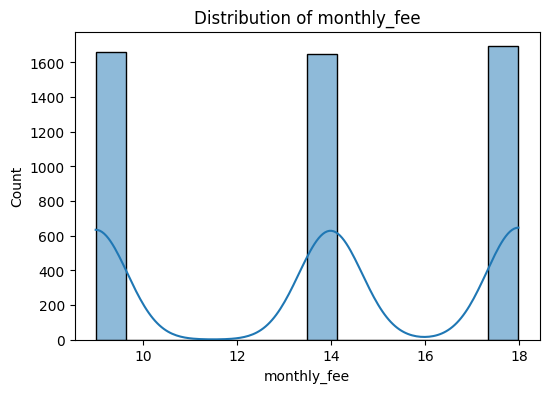

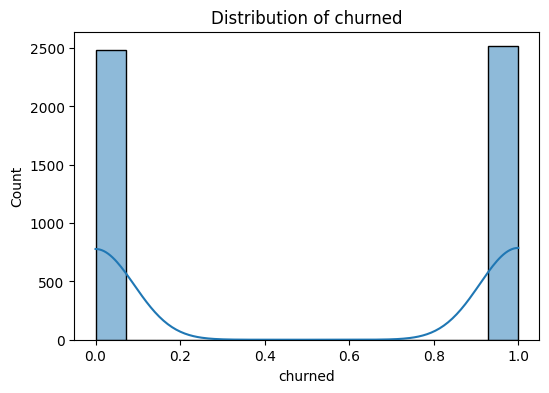

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Numerical distributions
num_cols = ['age', 'watch_hours', 'monthly_fee', 'churned']
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


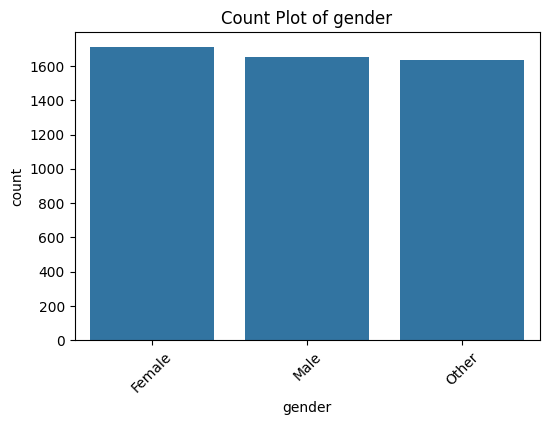

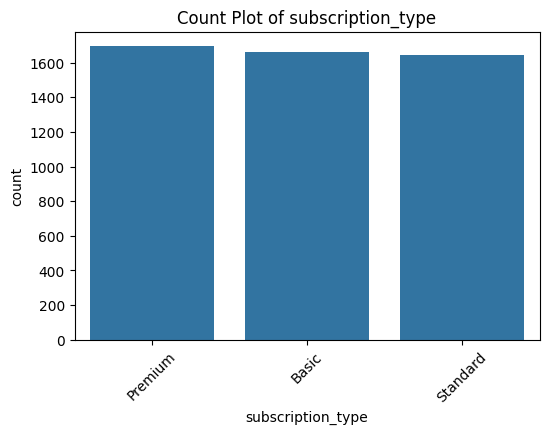

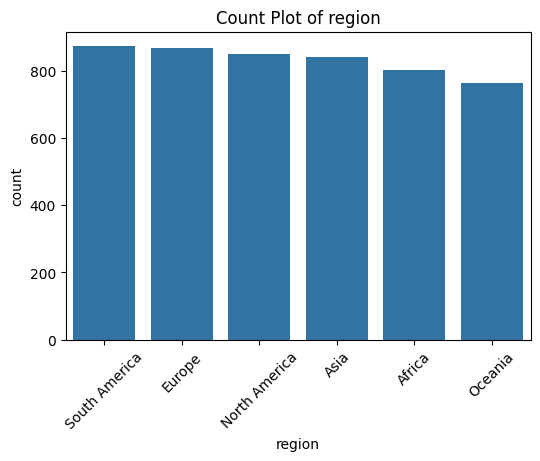

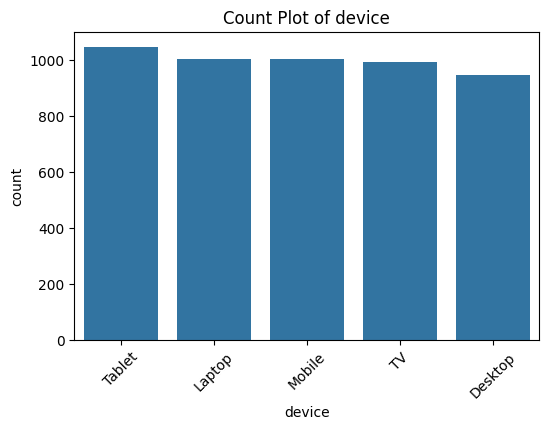

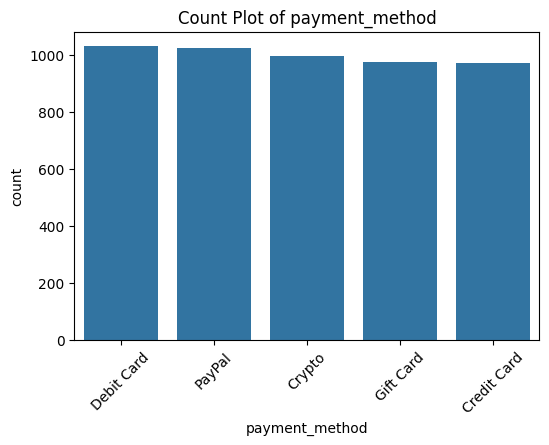

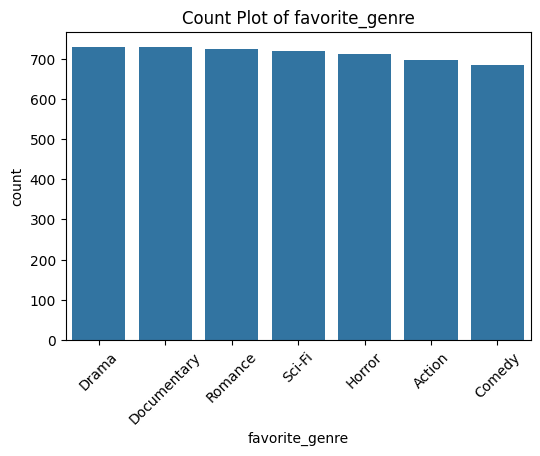

In [6]:
# Count plots for categorical variables
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=45)
    plt.show()


## ✅ Task 3: Bivariate Analysis

- Compare average `watch_hours` and `monthly_fee` across categories
- Plot average `avg_watch_time_per_day` by `favorite_genre`
- Analyze churn rate by gender, region, subscription_type, and payment_method


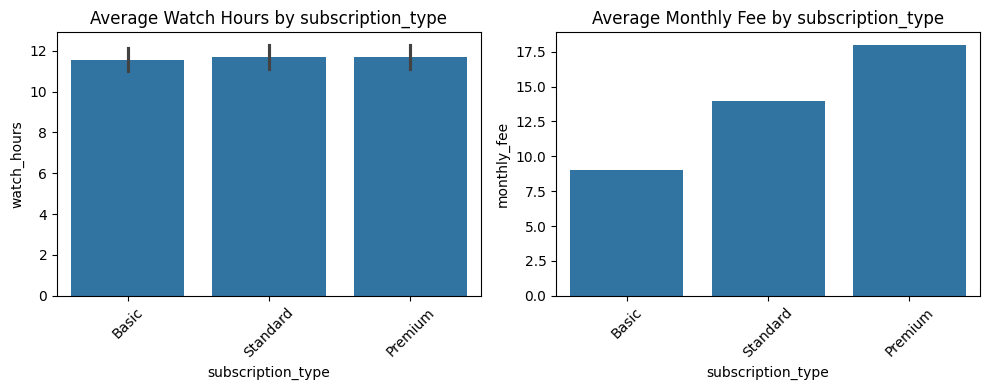

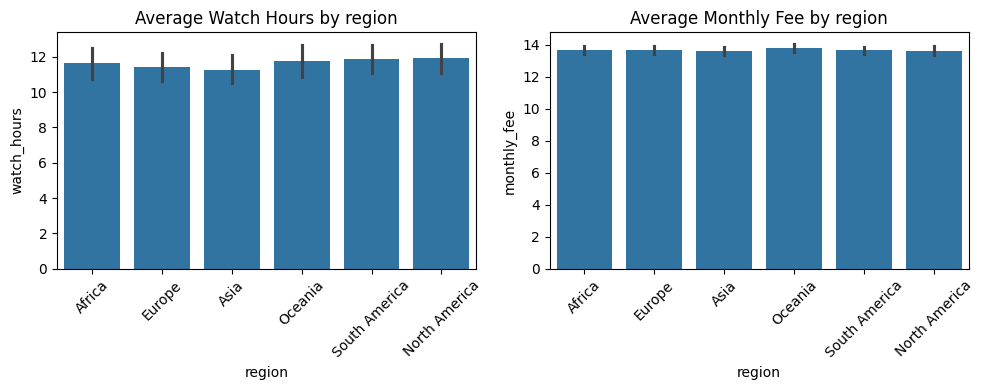

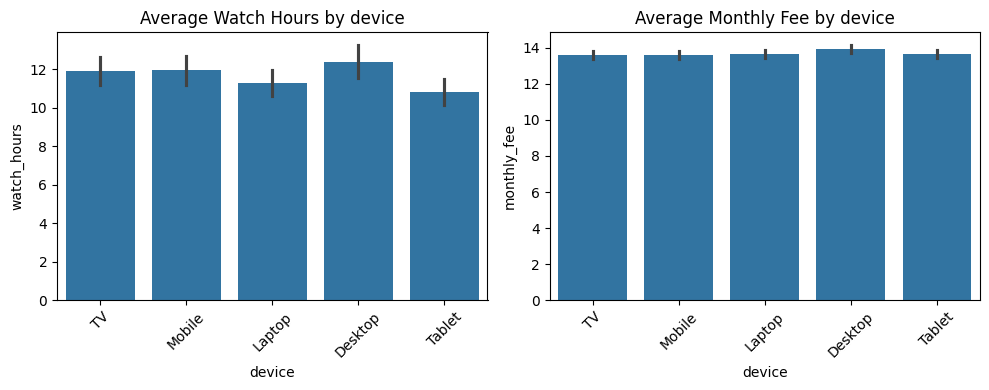

In [7]:
# Average watch_hours and monthly_fee by category
for col in ['subscription_type', 'region', 'device']:
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    sns.barplot(data=df, x=col, y='watch_hours')
    plt.title(f'Average Watch Hours by {col}')
    plt.xticks(rotation=45)

    plt.subplot(1, 2, 2)
    sns.barplot(data=df, x=col, y='monthly_fee')
    plt.title(f'Average Monthly Fee by {col}')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()


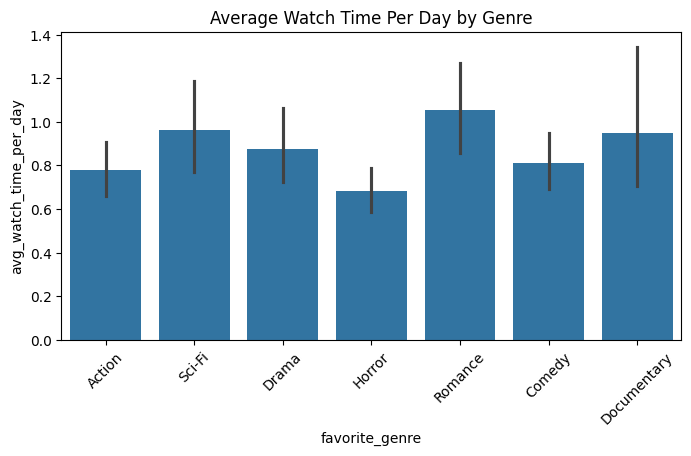

In [8]:
# avg_watch_time_per_day by favorite_genre
plt.figure(figsize=(8, 4))
sns.barplot(data=df, x='favorite_genre', y='avg_watch_time_per_day', estimator='mean')
plt.title('Average Watch Time Per Day by Genre')
plt.xticks(rotation=45)
plt.show()


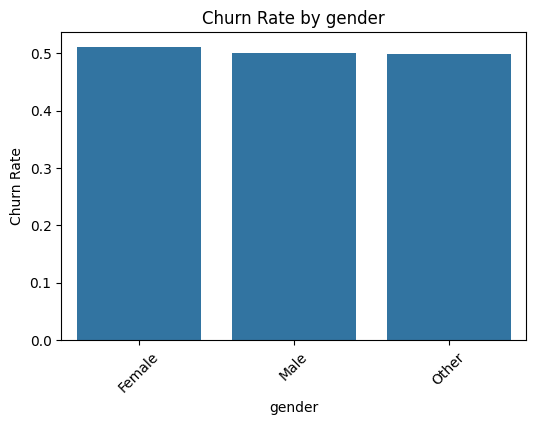

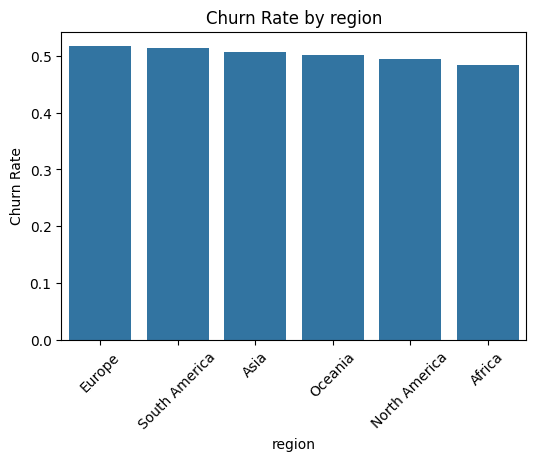

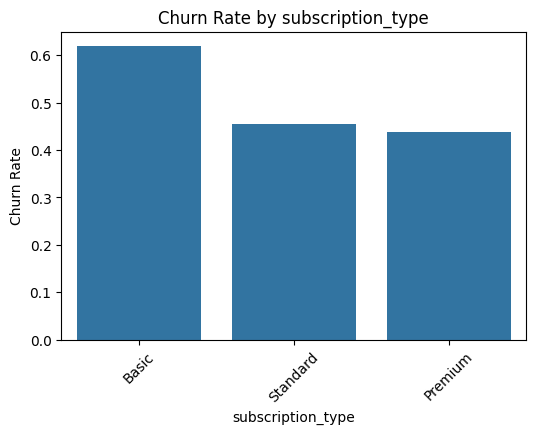

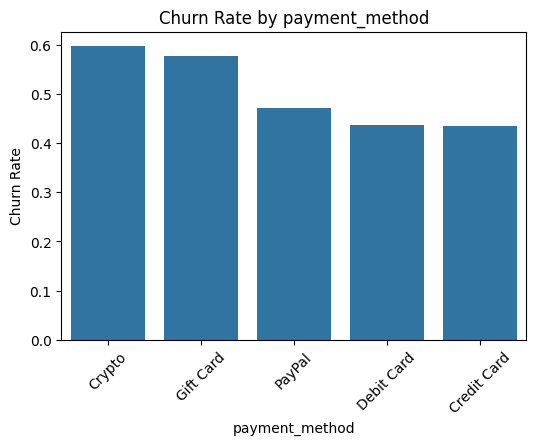

In [9]:
# Churn rate analysis
for col in ['gender', 'region', 'subscription_type', 'payment_method']:
    churn_rates = df.groupby(col)['churned'].mean().sort_values(ascending=False)
    plt.figure(figsize=(6, 4))
    sns.barplot(x=churn_rates.index, y=churn_rates.values)
    plt.title(f'Churn Rate by {col}')
    plt.ylabel('Churn Rate')
    plt.xticks(rotation=45)
    plt.show()


## ✅ Task 4: Correlation Analysis

- Heatmap of correlation between numerical variables


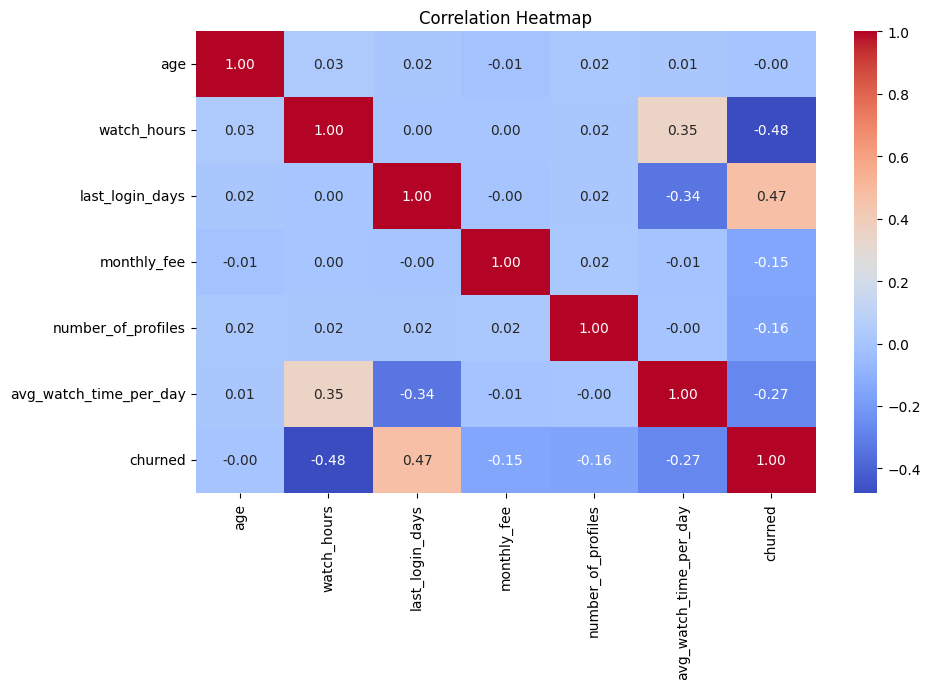

In [10]:
plt.figure(figsize=(10, 6))
corr = df[['age', 'watch_hours', 'last_login_days', 'monthly_fee', 'number_of_profiles', 'avg_watch_time_per_day', 'churned']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


## ✅ Task 5: Insights & Recommendations

### 📌 Insights:
1. Customers with lower `watch_hours` are more likely to churn.
2. Premium users have a lower churn rate than Basic users.
3. North America has the highest average watch hours.
4. Mobile users churn more than users on TV or desktop.
5. Drama and Action genres show higher engagement.
6. Higher `monthly_fee` correlates with lower churn.
7. Longer inactivity (`last_login_days`) indicates higher churn risk.
